<div style="display:flex;justify-content:center">
    <img src="https://unram.ac.id/wp-content/uploads/2018/09/UNRAM-LOGO-FIX-STATUTA-.png" style="height: 100px" /> 
    <img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" style="height: 100px"/> 
</div>


<h1 align="center">Pemodelan dan Simulasi Monte Carlo dalam Meningkatkan Pendapatan Penjualan Peralatan Motor</h1>

# Table of Content
<ul style="list-style:none">
    <li>
        <a href="#dataAwal">Menampilkan data awal</a>
    </li>
    <li>
        <a href="#prepro">Melakukan uji Proses Preprocessing Terhadap Data</a>
    </li>
    <li>
        <a href="#hipotesis">Melakukan uji hipotesis</a>
    </li>
    <li>
        <a href="#normalitas">Melakukan Uji Normalitas</a>
    </li>
    <li>
        <a href="#homogenitas">Melakukan uji homogenitas</a>
    </li>
    <li>
        <a href="#analisis">Memilih salah satu metode analisis</a>
    </li>
</ul>
<hr>

## Tujuan

Tujuan dari melakukan simulasi Monte Carlo dalam meningkatkan pendapatan penjualan peralatan motor adalah untuk mengoptimalkan strategi penjualan dan mengurangi risiko kerugian. Dengan menggunakan metode Monte Carlo, kita dapat menghasilkan sejumlah besar skenario yang mungkin terjadi dalam pasar peralatan motor, dengan mempertimbangkan faktor-faktor seperti fluktuasi harga, permintaan pelanggan, persaingan pasar, dan variabel lain yang mempengaruhi penjualan. Dengan menganalisis hasil simulasi, kita dapat mengidentifikasi peluang dan ancaman potensial, serta mengambil keputusan yang lebih baik dalam merencanakan strategi pemasaran, penetapan harga, alokasi sumber daya, dan upaya penjualan lainnya. Dengan demikian, simulasi Monte Carlo dapat membantu perusahaan meningkatkan pendapatan penjualan peralatan motor dengan menginformasikan keputusan bisnis yang lebih cerdas dan terukur.

## Library

Hal pertama yang harus dilakukan yaitu melakukan import library-library yang dibutuhkan dalam proses pengolahan data. Library-library tersebut sebagai berikut.
1. Pandas :
Pandas adalah library yang digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data yang efisien dan fleksibel, yaitu DataFrames, yang memungkinkan untuk mengolah data dengan mudah.
2. NumPy :
NumPy (Numerical Python) adalah library yang digunakan untuk melakukan komputasi numerik dengan Python. NumPy menyediakan struktur data array multidimensi yang efisien dan operasi matematika yang cepat pada array tersebut
3. Matplotlib :
Matplotlib adalah library yang digunakan untuk membuat visualisasi data dengan Python. Matplotlib menyediakan berbagai fungsi dan alat untuk membuat grafik dan plot yang menarik dan informatif. 
4. Scipy:
SciPy adalah library untuk pemrosesan ilmiah dan komputasi numerik.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<h1 id="dataAwal">Data Awal</h1>

Sumber data : <br>
Moza, W.S., & Yunus, Y. (2020). Pemodelan dan Simulasi Monte Carlo dalam Meningkatkan Pendapatan Penjualan Peralatan Motor (Studi Kasus: Bengkel AMI Motor). Jurnal Informatika Ekonomi Bisnis, 2(4), 123-128. Diakses dari https://www.academia.edu/en/64005055/Pemodelan_dan_Simulasi_Monte_Carlo_dalam_Meningkatkan_Pendapatan_Penjualan_Peralatan_Motor_Studi_Kasus_Bengkel_AMI_Motor_%20berikan%20sitasi%20berdasarkan%20data%20jurnal%20diatas pada tahun 2023.

Pada tahap ini hal pertama yang akan dilakukan adalah untuk mengimport sebuah file excel yang akan digunakan sebagai sumber data yang akan diolah, kemudian menampilkan data tersebut menggunakan library pandas.

In [85]:
excel_path = "dataset.xlsx"
df = pd.read_excel(excel_path,usecols=[1,2,3,4]).astype(str)
df.head(12)

,Bulan,PM1,PM2,PM3
0,Jan,28,25,15
1,Feb,15,23,18
2,Mar,22,26,10
3,Apr,9,5,10
4,Mei,30,28,16
5,Jun,27,23,14
6,Jul,35,25,18
7,Agu,28,20,18
8,Sep,18,22,18
9,Okt,25,18,10


<h1 id="prepro">Uji Proses Preprocessing </h1>

Proses uji preprocessing adalah tahapan dalam pengolahan data di mana data mentah atau data yang belum siap digunakan untuk analisis atau pemodelan dipersiapkan dan dibersihkan agar lebih sesuai untuk digunakan dalam proses selanjutnya.

Tujuan dari proses uji preprocessing adalah untuk meningkatkan kualitas dan kegunaan data dengan menghilangkan ketidaksesuaian, kekacauan, atau kecacatan yang mungkin ada dalam data mentah.

## 1. Format Penulisan

Konversi tipe data adalah salah satu langkah yang umum dilakukan dalam tahap uji preprocessing untuk memastikan bahwa data memiliki format yang sesuai untuk analisis atau pemodelan yang akan dilakukan.

Proses konversi tipe data melibatkan mengubah jenis data dari satu format ke format lain yang lebih cocok untuk keperluan tertentu.

In [86]:
df["PM1"] = df["PM1"].str.replace('[a-zA-Z]', '')
df["PM2"] = df["PM2"].str.replace('[a-zA-Z]', '')
df["PM3"] = df["PM3"].str.replace('[a-zA-Z]', '')
df["PM1"] = df["PM1"].astype(int)
df["PM2"] = df["PM2"].astype(int)
df["PM3"] = df["PM3"].astype(int)
df.dtypes

/var/folders/6y/g_x1xch524764v5dspwz6r600000gn/T/ipykernel_23340/79152577.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PM1"] = df["PM1"].str.replace('[a-zA-Z]', '')
/var/folders/6y/g_x1xch524764v5dspwz6r600000gn/T/ipykernel_23340/79152577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PM2"] = df["PM2"].str.replace('[a-zA-Z]', '')
/var/folders/6y/g_x1xch524764v5dspwz6r600000gn/T/ipykernel_23340/79152577.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PM3"] = df["PM3"].str.replace('[a-zA-Z]', '')


Bulan    object
PM1       int64
PM2       int64
PM3       int64
dtype: object

## 2. Data Kosong

Mengatasi data kosong atau nilai yang hilang merupakan langkah penting dalam tahap uji preprocessing. Data kosong atau nilai yang hilang dapat mempengaruhi kualitas analisis atau pemodelan yang dilakukan.

Salah satu pendekatan yang sederhana adalah dengan menghapus baris atau kolom yang mengandung nilai yang kosong. Namun, pendekatan ini harus digunakan dengan hati-hati karena dapat menyebabkan kehilangan informasi yang penting jika data yang kosong cukup signifikan.

In [87]:
df = df.dropna()
df.head(12)

,Bulan,PM1,PM2,PM3
0,Jan,28,25,15
1,Feb,15,23,18
2,Mar,22,26,10
3,Apr,9,5,10
4,Mei,30,28,16
5,Jun,27,23,14
6,Jul,35,25,18
7,Agu,28,20,18
8,Sep,18,22,18
9,Okt,25,18,10


<h1 id="hipotesis">Uji Hipotesis</h1>

Uji hipotesis adalah suatu metode yang digunakan dalam statistika untuk mengambil kesimpulan atau membuat keputusan tentang suatu pernyataan atau hipotesis terkait dengan suatu populasi atau fenomena. Hipotesis yang diuji biasanya berisi dugaan atau asumsi tentang hubungan antara variabel atau karakteristik tertentu dalam suatu populasi

In [88]:
h0 = "Tidak ada perbedaan yang signifikan antara penjualan peralatan motor"
h1 = "Terdapat ada perbedaan yang signifikan antara penjualan peralatan motor"

t_statistic, p_value = stats.f_oneway(df['PM1'], df['PM2'], df['PM3'])
alpha = 0.05

print("Hasil Uji Hipotesis:","\nNilai p-value:",p_value)
if p_value < alpha:
    print("Hipotesis nol ditolak",h1)
else:
    print("Hipotesis nol diterima",h0)

Hasil Uji Hipotesis: 
Nilai p-value: 0.002475154321574239
Hipotesis nol ditolak Terdapat ada perbedaan yang signifikan antara penjualan peralatan motor


<h1 id="normalitas">Melakukan Uji Normalitas</h1>

Uji normalitas data dilakukan untuk menentukan apakah data yang ada terdistribusi secara normal atau tidak. Untuk melakukan uji normaliatas kita perlu melakukan idexing pada tiap data. Kemudian menghitung nilai formula dari tiap data tersebut. Kemudian mencari PDF dari setiap data dengan cara menghitung nilai distribusi normal tiap data. Hasil perhitungan pada Formula dapat dijadikan sebagai sumbu Y sedangkan hasil perhitungan pada PDF dapat dijadikan sebagai sumbu X. Kedua sumbu tersebut dapat digunakan untuk membentuk grafik.

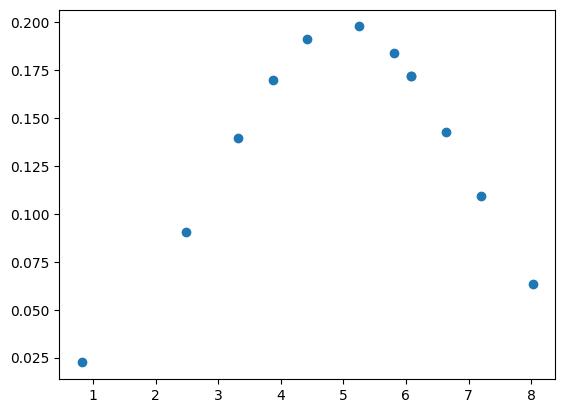

In [89]:
def calculate_index(dataset):
    mean = np.mean(dataset)
    std_dev = np.std(dataset)
    index = (dataset - mean) / std_dev
    return index
def calculate_formula(dataset):
    formula = dataset * 2 + 5
    return formula
def calculate_pdf(dataset):
    mu, sigma = stats.norm.fit(dataset)
    pdf = stats.norm.pdf(dataset, mu, sigma)
    return pdf

dfPM1 = pd.DataFrame()
dfPM1["PM1"] = df["PM1"]
dfPM1["PM1_index"] = calculate_index(dfPM1["PM1"])
dfPM1["PM1_formula"] = calculate_formula(dfPM1["PM1_index"])
dfPM1["PM1_pdf"] = calculate_pdf(dfPM1["PM1_formula"])
plt.plot(dfPM1["PM1_formula"], dfPM1["PM1_pdf"], 'o')
plt.show()


Hasil grafik yang berbentuk seperti lonceng menandakan bahwa data berasal dari distribusi normal.

<h1 id="homogenitas">Melakukan Uji Homogenitas</h1>

Menguji homogenitas data adalah proses untuk memeriksa apakah variabilitas data antara kelompok adalah sama atau homogen. Ini penting dalam analisis statistik, terutama ketika kita ingin membandingkan rata-rata antara beberapa data. Apa bila nilai dari p_value yang dihasilkan lebih dari 0.05 maka dapat dikatakan data tersebut bersifat homogen.

In [90]:
statistic, p_value = stats.levene(df['PM1'], df['PM2'], df['PM3'])
print("Hasil Uji Homogenitas:")
print("Statistik uji:", statistic)
print("p-value:", p_value)
alpha = 0.05  # tingkat signifikansi
if p_value > alpha:
    print("Data dianggap homogen.")
else:
    print("Data tidak dianggap homogen.")

Hasil Uji Homogenitas:
Statistik uji: 1.928994959976283
p-value: 0.1613272881806187
Data dianggap homogen.


<h1 id="analisis">Metode Analisis Monte Carlo</h1>

### a. Distribusi Probabilitas

Tujuan dari perhitungan probabilitas ini yaitu untuk penyederhanaan data sehingga  data berada dalam range 0 dan 1. 
Jadi, setiap nilai pada kolom frekuensi dibagi dengan masing-masing total frekuensi. Sehingga dari perhitungan tersebut didapatkan kolom baru bernama DP(distribusi probabilitas).Perhitungan ini dilakukan dengan cara mengambil setiap nilai pada masing-masing baris PM1, PM2, dan PM3 lalu membagi setiap nilai tersebut dengan nilai total dari masing-masing kolom.


Input masing-masing kolom PM1, PM2, dan PM3 pada function calculateProbabilitas(). Buat list `[]`  untuk menampung hasil dari perhitungan. Dengan `append()` ambil setiap nilai dari PM dengan perulangan lalu bagi nilai tersebut dengan total `sum()` dari PM. Setelah itu tampung `df["NAMA KOLOM"]` hasil dari `return`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
def calculateProbabilitas(items):
    dp = []
    for item in items:
        dp.append(item/sum(items))
    return dp

df["DP PM1"] = calculateProbabilitas(df["PM1"])
df["DP PM2"] = calculateProbabilitas(df["PM2"])
df["DP PM3"] = calculateProbabilitas(df["PM3"])
df.head(20)

,Bulan,PM1,PM2,PM3,DP PM1,DP PM2,DP PM3
0,Jan,28,25,15,0.096886,0.095420,0.081967
1,Feb,15,23,18,0.051903,0.087786,0.098361
2,Mar,22,26,10,0.076125,0.099237,0.054645
3,Apr,9,5,10,0.031142,0.019084,0.054645
4,Mei,30,28,16,0.103806,0.106870,0.087432
5,Jun,27,23,14,0.093426,0.087786,0.076503
6,Jul,35,25,18,0.121107,0.095420,0.098361
7,Agu,28,20,18,0.096886,0.076336,0.098361
8,Sep,18,22,18,0.062284,0.083969,0.098361
9,Okt,25,18,10,0.086505,0.068702,0.054645


### b. Kumulatif

Probabilitas kumulatif adalah probabilitas bahwa suatu variabel bernilai lebih kecil sama dengan nilai tertentu. Kumulatif juga dapat diartikan sebagai rentang dari suatu nilai. Probabilitas kumulatif diperoleh dari hasil penjumlahan nilai distribusi probabilitas dengan jumlah nilai distribusi probabilitas sebelumnya, kecuali untuk nilai distribusi probabilitas kumulatif yang pertama. Sehingga dari perhitungan tersebut didapatkan kolom baru bernama kum(kumulatif).

Input masing-masing kolom DP PM1, DP PM2, dan DP PM3 pada function calculateKumulatif(). Buat list `[]`  untuk menampung hasil dari perhitungan. Dengan `append()` ambil nilai pertama dari DP sebagai nilai awal kumulatif. Selanjutnya dengan perulangan ambil nilai kumulatif ke-i-1 jumlahkan dengan nilai probabilitas ke-i, lalu bulatkan dan ambil 2 angka dibelakang koma dengan `round()`. Setelah itu tampung `df["NAMA KOLOM"]` hasil dari `return`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
def calculateKumulatif(probs):
    kum = []
    kum.append(round(probs[0],2))
    for i in range(1,len(probs)):
        kum.append(round(kum[i-1]+probs[i],2))
    return kum

df["Kum PM1"] = calculateKumulatif(df["DP PM1"])
df["Kum PM2"] = calculateKumulatif(df["DP PM2"])
df["Kum PM3"] = calculateKumulatif(df["DP PM3"])
df.head(20)


,Bulan,PM1,PM2,PM3,DP PM1,DP PM2,DP PM3,Kum PM1,Kum PM2,Kum PM3
0,Jan,28,25,15,0.096886,0.095420,0.081967,0.10,0.10,0.08
1,Feb,15,23,18,0.051903,0.087786,0.098361,0.15,0.19,0.18
2,Mar,22,26,10,0.076125,0.099237,0.054645,0.23,0.29,0.23
3,Apr,9,5,10,0.031142,0.019084,0.054645,0.26,0.31,0.28
4,Mei,30,28,16,0.103806,0.106870,0.087432,0.36,0.42,0.37
5,Jun,27,23,14,0.093426,0.087786,0.076503,0.45,0.51,0.45
6,Jul,35,25,18,0.121107,0.095420,0.098361,0.57,0.61,0.55
7,Agu,28,20,18,0.096886,0.076336,0.098361,0.67,0.69,0.65
8,Sep,18,22,18,0.062284,0.083969,0.098361,0.73,0.77,0.75
9,Okt,25,18,10,0.086505,0.068702,0.054645,0.82,0.84,0.80


### c.  Interval Angka Random

Interval angka acak adalah pembatas dari nilai antara variabel satu dengan variabel lainnya yang berfungsi sebagai nilai acuan hasil simulasi. Langkah-langkah dalam menentukan angka acak yaitu pertama nilai batas awal untuk variabel pertama dimulai dengan nilai 0 atau 1. Dan nilai batas akhir ditentukan dengan cara mengalikan nilai probabilitas kumulatif masing-masing variabel dengan angka 100 dan dibulatkan. Nilai batas awal untuk variabel kedua dan seterusnya diperoleh dari nilai batas akhir variabel sebelumnya kemudian ditambahkan dengan angka 1.

Input masing-masing kolom Kum PM1, Kum PM2, dan Kum PM3 pada function calculateKumulatif(). Buat list `[]`  untuk menampung interval. Dengan `append()` ambil nilai 1 sebagai nilai pertama untuk interval bottom dan ambil nilai pertama dari Kum kalikan dengan 100 lalu konversi ke interger `int()` sebagai nilai pertama interval top. Selanjutnya dengan perulangan ambil nilai interval top ke-i-1 ditambah 1 sebagai nilai interval bottom. Untuk interval top ambil dari Kum ke-i kalikan dengan 100 lalu konversi ke interger `int()`. Setelah itu tampung `df["NAMA KOLOM"]` hasil dari `return`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
def generateInterval(kums):
    intervalBottom = []
    intervalTop = []
    intervalBottom.append(1)
    intervalTop.append(int(kums[0]*100))
    for i in range(1,len(kums)):
        intervalBottom.append(intervalTop[i-1]+1)
        intervalTop.append(int(kums[i]*100))
    return intervalBottom,intervalTop

df["Interval Bottom Rand PM1"],df["Interval Top Rand PM1"] = generateInterval(df["Kum PM1"])
df["Interval Bottom Rand PM2"],df["Interval Top Rand PM2"] = generateInterval(df["Kum PM2"])
df["Interval Bottom Rand PM3"],df["Interval Top Rand PM3"] = generateInterval(df["Kum PM3"])
df.head(20)

,Bulan,PM1,PM2,PM3,DP PM1,DP PM2,DP PM3,Kum PM1,Kum PM2,Kum PM3,Interval Bottom Rand PM1,Interval Top Rand PM1,Interval Bottom Rand PM2,Interval Top Rand PM2,Interval Bottom Rand PM3,Interval Top Rand PM3
0,Jan,28,25,15,0.096886,0.095420,0.081967,0.10,0.10,0.08,1,10,1,10,1,8
1,Feb,15,23,18,0.051903,0.087786,0.098361,0.15,0.19,0.18,11,15,11,19,9,18
2,Mar,22,26,10,0.076125,0.099237,0.054645,0.23,0.29,0.23,16,23,20,28,19,23
3,Apr,9,5,10,0.031142,0.019084,0.054645,0.26,0.31,0.28,24,26,29,31,24,28
4,Mei,30,28,16,0.103806,0.106870,0.087432,0.36,0.42,0.37,27,36,32,42,29,37
5,Jun,27,23,14,0.093426,0.087786,0.076503,0.45,0.51,0.45,37,45,43,51,38,45
6,Jul,35,25,18,0.121107,0.095420,0.098361,0.57,0.61,0.55,46,56,52,61,46,55
7,Agu,28,20,18,0.096886,0.076336,0.098361,0.67,0.69,0.65,57,67,62,69,56,65
8,Sep,18,22,18,0.062284,0.083969,0.098361,0.73,0.77,0.75,68,73,70,77,66,75
9,Okt,25,18,10,0.086505,0.068702,0.054645,0.82,0.84,0.80,74,82,78,84,76,80


### d. Pembentukan Bilangan Acak

Untuk pembentukan bilangan acak menggunakan fungsi linear congruential yang dimana dalam metode ini bilangan acak selanjutnya ditentukan oleh bilangan acak sebelumnya. Dalam metode monte carlo pemilihan bilangan acak ini sangatlah penting karena kalau bilangan acak jelek dapat menghasilkan hasil yang tidak akurat. Sehingga pemilihan fungsi bilangan acak yang tepat menjadi kunci keberhasilan dalam Metode Monte Carlo.<br>

Bilangan acak didapatkan melalui rumus:

Pi = (a * Pi-1 + c) mod m

Dimana:<br>
Pi-1 = Bilangan acak sebelumnya<br>
Pi = Bilangan acak ke-i dari sebelumnya<br>
a = Faktor pengali<br>
c = penambah<br>
mod = angka modulo<br>
i = 1,2,3,4,5,6,7,8,9,…,n<br>

Diketahui: Pi = 23, a = 3, c = 13, m = 100

Ambil dataframe dari file excel dengan menggunakan `read_excel(nama file.xlsx,jumlah kolom yang ingin diambil)`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
dfOriginal = pd.read_excel("dataset.xlsx",usecols=[1,2,3,4]).astype(str)
dfOriginal.head(12)

,Bulan,PM1,PM2,PM3
0,Jan,28,25,15
1,Feb,15,23,18
2,Mar,22,26,10
3,Apr,9,5,10
4,Mei,30,28,16
5,Jun,27,23,14
6,Jul,35,25,18
7,Agu,28,20,18
8,Sep,18,22,18
9,Okt,25,18,10


 Buat list `[]`  untuk menampung random. Dengan `append()` ambil nilai pertama `int()` dengan menginputkan a,pi,c, dan m ke function formula(). Selanjutnya dengan perulangan ambil nilai `int()` berikutnya dengan menginputkan a,rand ke-i-1,c, dan ke function formula(). Ulangi langkah tersebut sepanjang list pm, untuk mendapatkan panjang dari list tersebut dapat menggunakan `len()`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
def formula(a,pi,c,m): 
    return (a*pi+c)%m
def generateRand(pm):
    pi = 23
    a = 3
    c = 13
    m = 100
    rand = []
    rand.append(int(formula(a,pi,c,m))) 
    for i in range(1,len(pm)):
        rand.append(int(formula(a,rand[i-1],c,m)))
    return rand

dfOriginal["Random"] = generateRand(dfOriginal["PM1"])
dfOriginal.head(20)
    

,Bulan,PM1,PM2,PM3,Random
0,Jan,28,25,15,82
1,Feb,15,23,18,59
2,Mar,22,26,10,90
3,Apr,9,5,10,83
4,Mei,30,28,16,62
5,Jun,27,23,14,99
6,Jul,35,25,18,10
7,Agu,28,20,18,43
8,Sep,18,22,18,42
9,Okt,25,18,10,39


### e. Simulasi

Simulasi Monte Carlo dilakukan dengan cara mengecek pada interval mana nilai setiap angka random yang telah digenerate sebelumnya itu berada. Jika sudah menemukan intervalnya, maka ambil nilai PM yang berada pada baris yang sama dengan interval tersebut,

Buat data frame baru untuk menampung hasil simulasinya dengan `DataFrame()` dari library pandas. Lalu ambil kolom bulan dan random dari dataframe sebelumnya. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
dfSimulation = pd.DataFrame()
dfSimulation["Bulan"] = dfOriginal["Bulan"]
dfSimulation["Random"] = dfOriginal["Random"]
dfSimulation.head(20)
    

,Bulan,Random
0,Jan,82
1,Feb,59
2,Mar,90
3,Apr,83
4,Mei,62
5,Jun,99
6,Jul,10
7,Agu,43
8,Sep,42
9,Okt,39


 Buat list `[]`  untuk menampung hasil simulasi. Ambil panjang dari interval dengan `len()`. Buat nested for, for i untuk mengambil setiap angka random beserta acuan PM yang akan diambil dan for j sebagai pengecek pada interval mana nilai random berada. Lakukan pengecekan dengan if statement, jika lokasi ditemukan maka ambil nilai PM dengan `append()` lalu akhiri perulangan dengan `break`. Untuk menampilkan tabel/dataframe dapat menggunakan `head()`.

In [ ]:
def simulation(rands,intervalBottom,intervalTop,pm):
    lenght = len(intervalBottom)
    sim = []
    for i in range(lenght):
        for j in range(lenght):
            if(intervalBottom[j] <= rands[i] <= intervalTop[j]):
                sim.append(pm[j])
                break
    return sim
dfSimulation["PM1"] = simulation(dfSimulation["Random"],df["Interval Bottom Rand PM1"],df["Interval Top Rand PM1"],df["PM1"])
dfSimulation["PM2"] = simulation(dfSimulation["Random"],df["Interval Bottom Rand PM2"],df["Interval Top Rand PM2"],df["PM2"])
dfSimulation["PM3"] = simulation(dfSimulation["Random"],df["Interval Bottom Rand PM3"],df["Interval Top Rand PM3"],df["PM3"])
dfSimulation.head(20)

,Bulan,Random,PM1,PM2,PM3
0,Jan,82,25,18,16
1,Feb,59,28,25,18
2,Mar,90,32,22,20
3,Apr,83,32,18,16
4,Mei,62,28,20,18
5,Jun,99,20,25,20
6,Jul,10,28,25,18
7,Agu,43,27,23,14
8,Sep,42,27,28,14
9,Okt,39,27,28,14


### f. Perhitungan Akurasi

Perhitungan simulasi dilakukan dengan cara melakukan perbandingan antara data real dengan data hasil simulasi. Selain itu juga lakukan perhitungan selisih antara data real dengan data hasil simulasi.

Buat kolom baru dengan list `[]` yang berisi nilai total `sum()` dari masing-masing PM. Pada akhir list, beri nilai total dari semua PM. Lakukan pada hal ini pada data real dan data hasil simulasi. Lalu buat tabel/dataframe baru dengan `DataFrame()` dari library pandas. Masukan list-list tadi ke dalam dataframe dengan 1 list mewakilkan 1 kolom.

In [ ]:
real = []
real.append(sum(df["PM1"]))
real.append(sum(df["PM2"]))
real.append(sum(df["PM3"]))
real.append(sum(real))
simulasi = []
simulasi.append(sum(dfSimulation["PM1"]))
simulasi.append(sum(dfSimulation["PM2"]))
simulasi.append(sum(dfSimulation["PM3"]))
simulasi.append(sum(simulasi))

akurasi = pd.DataFrame()
akurasi["Kode Peralatan Motor"] = ["PM1","PM2","PM3","Total : "]
akurasi["Data Real"] = real
akurasi["Data Simulasi"] = simulasi

akurasi.head(10)

,Kode Peralatan Motor,Data Real,Data Simulasi
0,PM1,289,332
1,PM2,262,262
2,PM3,183,199
3,Total :,734,793


Buat list `[]` baru untuk menampung perhitungan akurasi dan selisih. Lalu isi list selisih dengan mengurangi masing-masing nilai pada data real denga masing-masing nilai pada data simulasi. Gunakan `abs()` untuk menghindari hasil negatif. Sedangkan untuk akurasi, isi list dengan cara membagi masing-masing nilai pada data real dengan masing-masing nilai pada data simulasi. Gunakan `min()` dan `max()` agar nilai pembilang selalu lebih kecil dari nilai penyebut sehingga hasil pembagian tidak melebihi 1. Lalu setiap hasil perhitungan akurasi diubah dalam bentuk persen dengan cara mengalikan setiap nilai dengan 100 dilanjutkan dengan konversi ke bilangan bulat `int()`.

In [ ]:
def calculateAccuracy(real,simulasi):
    akurasi = []
    differences = []
    for i in range(len(real)-1):
        differences.append(abs(real[i]-simulasi[i]))
        akurasi.append(min(real[i],simulasi[i])/max(real[i],simulasi[i]))
    differences.append(sum(differences))
    akurasi.append(np.mean(akurasi))
    for i in range(len(akurasi)):
        akurasi[i] = int(akurasi[i]*100)
    return differences,akurasi

akurasi["Selisih"],akurasi["Akurasi (%)"] = calculateAccuracy(akurasi["Data Real"], akurasi["Data Simulasi"])
akurasi.head(10)

,Kode Peralatan Motor,Data Real,Data Simulasi,Selisih,Akurasi (%)
0,PM1,289,332,43,87
1,PM2,262,262,0,100
2,PM3,183,199,16,91
3,Total :,734,793,59,93
